In [ ]:
import pandas as pd
df=pd.read_csv('Dataset.csv')
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
# Encode categorical features
le = LabelEncoder()
df['Cuisines'] = le.fit_transform(df['Cuisines'])

# Scale numerical data
scaler = StandardScaler()
df[['Votes', 'Aggregate rating']] = scaler.fit_transform(df[['Votes', 'Aggregate rating']])

In [ ]:
# Features and target
X = df[['Cuisines', 'Votes', 'Aggregate rating']]
y = df['Price range']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=20, batch_size=4, validation_split=0.1)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4499 - loss: -409497.2188 - val_accuracy: 0.4908 - val_loss: -5591340.5000
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4592 - loss: -12500487.0000 - val_accuracy: 0.4908 - val_loss: -36558948.0000
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4588 - loss: -55632044.0000 - val_accuracy: 0.4908 - val_loss: -101836640.0000
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4623 - loss: -140479616.0000 - val_accuracy: 0.4908 - val_loss: -207781568.0000
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4667 - loss: -266330960.0000 - val_accuracy: 0.4908 - val_loss: -367454816.0000
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4616 - loss: -472743776.0000 - val_accuracy: 0.4908 - val_loss: -594644352.0000
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4594 - loss: -751929024.0000 - val_accuracy: 0.4908 

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4603 - loss: -18908903424.0000 - val_accuracy: 0.4908 - val_loss: -18910171136.0000
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4607 - loss: -21736622080.0000 - val_accuracy: 0.4908 - val_loss: -21580701696.0000
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4645 - loss: -24706805760.0000 - val_accuracy: 0.4908 - val_loss: -24479240192.0000
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4715 - loss: -26908946432.0000 - val_accuracy: 0.4908 - val_loss: -27661744128.0000
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4593 - loss: -31283091456.0000 - val_accuracy: 0.4908 - val_loss: -31112169472.0000
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4576 - loss: -35296796672.0000 - val_accuracy: 0.4908 - val_loss: -34816692224.0000
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4590 - loss: -393252

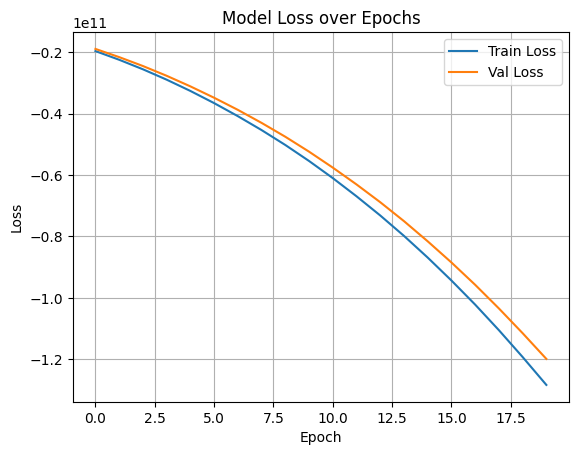

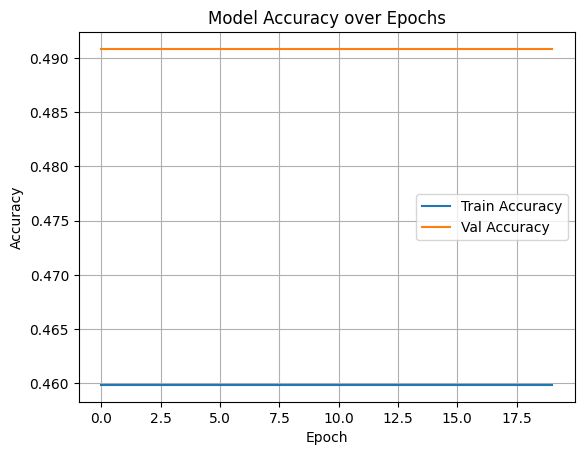

In [ ]:
import matplotlib.pyplot as plt

# Assuming `history` is from model.fit()
history = model.fit(X_train, y_train, epochs=10, batch_size=4, validation_split=0.1)

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


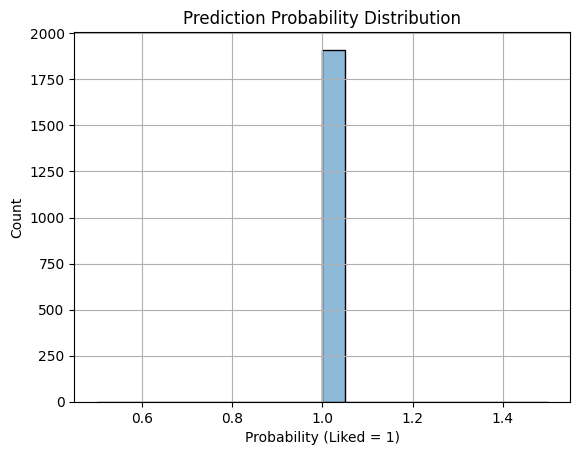

In [ ]:
import seaborn as sns

# Get predictions on test set
y_pred_probs = model.predict(X_test).flatten()

# Plot
sns.histplot(y_pred_probs, bins=20, kde=True)
plt.title("Prediction Probability Distribution")
plt.xlabel("Probability (Liked = 1)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


ExactExplainer explainer: 1912it [00:32, 55.45it/s]                          


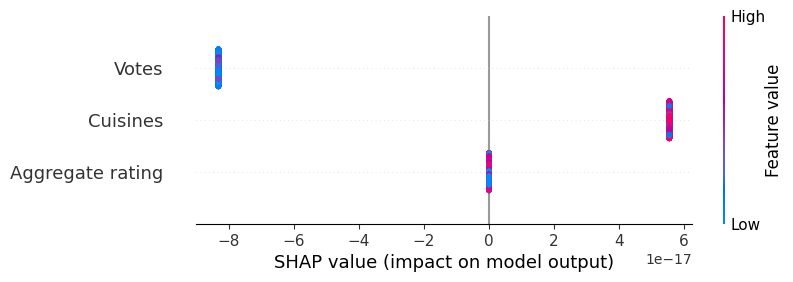

In [ ]:

import shap

explainer = shap.Explainer(model, X_train, feature_names=X.columns.tolist())
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)


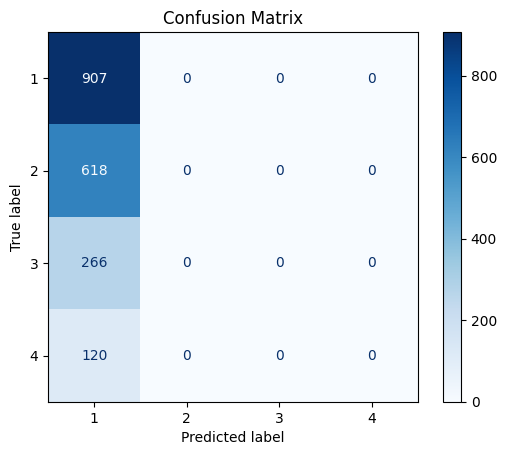

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_classes = (y_pred_probs >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_classes)

# Get unique classes from y_test
unique_classes = np.unique(y_test)

# If there are more than 2 classes, adjust display labels
display_labels = ["Not Liked", "Liked"]
if len(unique_classes) > 2:
    display_labels = unique_classes  # or create appropriate labels for all classes


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4820 - loss: -122418708480.0000
Test Accuracy: 0.47


In [ ]:
def scale_and_predict(cuisines, votes, Aggregate_rating):
    """Scales numerical features and predicts using the model.

    Args:
        cuisines (str): Cuisine type.
        votes (int): Number of votes.
        Aggregate_rating (float): Aggregate rating.

    Returns:
        str: Recommendation message.
    """
    cuisine_encoded = le.transform([cuisines])[0]

    # Create a DataFrame for scaling
    input_df = pd.DataFrame([[votes, Aggregate_rating]], columns=['Votes', 'Aggregate rating'])

    # Now scale using the DataFrame
    votes_scaled, rating_scaled = scaler.transform(input_df)[0]

    input_data = tf.convert_to_tensor([[cuisine_encoded, votes_scaled, rating_scaled]])
    prob = model.predict(input_data)[0][0]

    if prob >= 0.5:
        return f"✅ Recommended (Confidence: {prob:.2f})"
    else:
        return f"❌ Not Recommended (Confidence: {prob:.2f})"

# Example usage
result = scale_and_predict('Italian', 230, 4.4)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
✅ Recommended (Confidence: 1.00)
